10.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd

Text(0, 0.5, 'N')

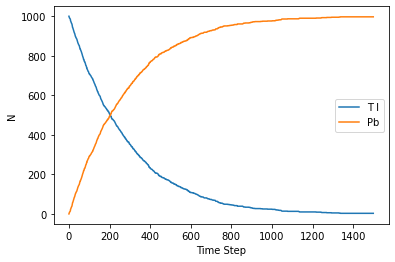

In [2]:
time = 1500
Tln = 1000
Pbn = 0
t = 1
tau = 3.052*60 
prob = 1 - 2**(-t/tau)



Tl_ev = []
Pb_ev = []
times=[]
for i in range(time):
    Tl_ev.append(Tln)
    Pb_ev.append(Pbn)
    times.append(i)
    Tl = np.random.uniform(0,1,size=Tln)
    Tln = len( Tl[prob-Tl <= 0] )
    Pbn= Pbn + len( Tl[prob -Tl> 0] )

        
labels = ['T l','Pb']
plt.plot( times, Tl_ev )
plt.plot( times, Pb_ev )
plt.legend(labels)
plt.xlabel('Time Step')
plt.ylabel('N')

Text(0.5, 0, 'time step')

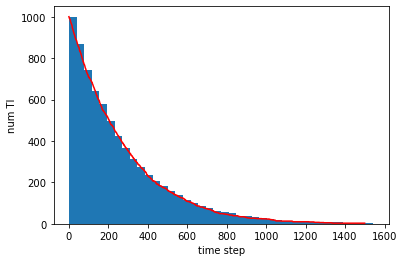

In [3]:
def rev(p, mu=np.log(2)/tau):
    return -np.log(1-p)/mu

x = np.random.uniform(0, 1,1000)
t=rev(x)
plt.hist(t,bins=40,cumulative=-1)[2]
plt.plot(times,Tl_ev,c="r",label="First Method")
plt.ylabel('num Tl')
plt.xlabel('time step')

10.2

In [4]:
alpha=10**6
Z=79
e=1.60217*(10**-19)
E=7.7*(10**6)*e
epsilon_0=8.85419*(10**-12)
a0=5.29177*(10**-11)
n=np.random.rand(alpha)
b=np.sqrt( (-2)*( a0/100 )**(2) * np.log( 1-n ) )
angle=2*np.arctan( Z*e**2 / (2*np.pi*epsilon_0*E*b ) )
f=sum(1 if a > np.pi/2 else 0 for a in angle)/alpha
print('Fraction greater than  𝜋/2: ', f)

Fraction greater than  𝜋/2:  0.001516


10.3

<ipython-input-5-04a8aeebf75d>:3: RuntimeWarning: divide by zero encountered in true_divide
  return (np.sin(1/(x*(2-x))))**2
<ipython-input-5-04a8aeebf75d>:3: RuntimeWarning: invalid value encountered in sin
  return (np.sin(1/(x*(2-x))))**2
<ipython-input-5-04a8aeebf75d>:8: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral_real = integrate.quad( f, 0, 2, limit=100000 )[0]


True value with scipy= 1.4514015822549402
Value Monte Carlo integration= 1.451216
Error Monte Carlo integration= 0.00018558225494014202
Value mean value method= 1.4515486540068885
Error mean value method= 0.00014707175194828004


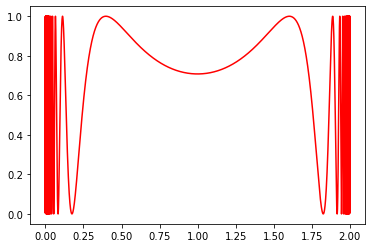

In [5]:
from scipy import integrate
def f(x):
    return (np.sin(1/(x*(2-x))))**2


dx = np.linspace(0,2,100000) # dx=2/100000
plt.plot(dx,f(dx),'r-')
integral_real = integrate.quad( f, 0, 2, limit=100000 )[0]
print("True value with scipy=", integral_real )

# Monte Carlo integration hit and miss

N = 1000000
c = 0
for i in range(N):
    x = 2*np.random.random()
    if np.random.random() < f(x): c += 1
value = 2*c/N
print('Value Monte Carlo integration=', value )
print('Error Monte Carlo integration=', abs(integral_real-value) )

mean = 2 * f( 2*np.random.random(N) ).sum() / N
print('Value mean value method=',mean)
print('Error mean value method=',abs(integral_real-mean))

In [6]:
10.4

10.4

In [9]:
def DD(p):
    x,y = p
    if x**2+y**2<1:
        return 1
    else:
        return 0
    
N = 100000
points = 2*np.random.random(size=(N, 2))-1
c = 0
for i in points:
    c+=DD(i)
print("2D =",(4*c/N))

def D_10(p):
    to_sum = p**2
    if to_sum.sum()<1:
        return 1
    else:
        return 0

points = 2*np.random.random(size=(N, 10))-1
c = 0
for p in points:
    c+=D_10(p)
print("10D = ",(2**10*c/N))

2D = 3.1344
10D =  2.4576


In [10]:
def w(x):
    return 1/np.sqrt(x)
def f(x):
    return 1/(np.sqrt(x)*(np.exp(x)+1))
def integral(N, x1, x2):
    sampling = integrate.quad(w,x1,x2)[0]
    x = np.random.rand(N)
    res = f(x)/w(x)
    return res.sum()*sampling/N

N = int(10**5)

print("Result: ",integral(N,0,1))

Result:  0.7600262297571981
